In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import seaborn as sns
import os
from collections import Counter
import sklearn
from sklearn.decomposition import PCA
from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn import cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("eda_data.csv")
df

,Player,Overall Score,Height,Weight,Age,Preferred Foot,Preferred Positions,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Attack Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long Pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,Free Kick Acc,Penalties,Volleys
0,Lionel Messi,93,170,72,34,1,3,96.0,96.0,20.0,24.0,35.0,44.0,94.0,93.0,40.0,95.0,96.0,85.0,91.0,91.0,91.0,72.0,69.0,95.0,80.0,91.0,68.0,70.0,86.0,95.0,94.0,93.0,94.0,75.0,88.0
1,Robert Lewandowski,92,185,81,33,0,3,88.0,85.0,35.0,19.0,42.0,81.0,93.0,95.0,49.0,81.0,88.0,71.0,85.0,70.0,77.0,76.0,86.0,82.0,79.0,77.0,85.0,90.0,90.0,95.0,87.0,79.0,85.0,89.0,89.0
2,Kylian Mbappé,91,182,73,23,0,3,91.0,93.0,26.0,32.0,34.0,62.0,93.0,92.0,38.0,82.0,88.0,78.0,85.0,71.0,97.0,88.0,77.0,83.0,97.0,92.0,78.0,72.0,86.0,93.0,82.0,80.0,69.0,79.0,83.0
3,Kevin De Bruyne,91,181,70,30,0,2,90.0,88.0,68.0,53.0,65.0,75.0,91.0,88.0,66.0,94.0,89.0,94.0,93.0,93.0,76.0,88.0,74.0,78.0,76.0,79.0,63.0,55.0,91.0,81.0,91.0,85.0,83.0,83.0,82.0
4,Neymar Jr,91,175,68,29,0,3,95.0,95.0,35.0,29.0,32.0,63.0,89.0,86.0,37.0,90.0,93.0,85.0,86.0,81.0,93.0,81.0,53.0,84.0,89.0,96.0,64.0,63.0,80.0,83.0,81.0,88.0,87.0,93.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,Renaud Emond,69,186,73,30,0,3,61.0,60.0,14.0,21.0,18.0,44.0,73.0,79.0,38.0,59.0,77.0,48.0,62.0,41.0,51.0,69.0,72.0,61.0,64.0,65.0,72.0,75.0,70.0,73.0,62.0,64.0,66.0,78.0,71.0
5062,William Mendieta,69,179,77,32,0,2,71.0,71.0,20.0,39.0,40.0,50.0,67.0,62.0,25.0,70.0,58.0,68.0,70.0,69.0,69.0,59.0,69.0,68.0,62.0,68.0,47.0,40.0,70.0,67.0,70.0,61.0,59.0,65.0,62.0
5063,Glen Rea,69,184,73,27,0,2,65.0,57.0,70.0,67.0,71.0,73.0,67.0,37.0,73.0,50.0,64.0,43.0,67.0,60.0,62.0,74.0,78.0,57.0,64.0,60.0,81.0,70.0,40.0,29.0,30.0,32.0,28.0,29.0,35.0
5064,Gustav Engvall,69,184,85,25,0,3,71.0,71.0,25.0,21.0,36.0,67.0,66.0,73.0,22.0,64.0,70.0,65.0,59.0,45.0,68.0,74.0,76.0,59.0,78.0,63.0,66.0,61.0,72.0,70.0,57.0,52.0,48.0,58.0,57.0


array([[<AxesSubplot:title={'center':'Overall Score'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Ball Control'}>,
        <AxesSubplot:title={'center':'Dribbling'}>],
       [<AxesSubplot:title={'center':'Marking'}>,
        <AxesSubplot:title={'center':'Slide Tackle'}>,
        <AxesSubplot:title={'center':'Stand Tackle'}>,
        <AxesSubplot:title={'center':'Aggression'}>,
        <AxesSubplot:title={'center':'Reactions'}>,
        <AxesSubplot:title={'center':'Attack Position'}>],
       [<AxesSubplot:title={'center':'Interceptions'}>,
        <AxesSubplot:title={'center':'Vision'}>,
        <AxesSubplot:title={'center':'Composure'}>,
        <AxesSubplot:title={'center':'Crossing'}>,
        <AxesSubplot:title={'center':'Short Pass'}>,
        <AxesSubplot:title={'center':'Long Pass'}>],
       [<AxesSubplot:title={'center':'Acceleration'}>,

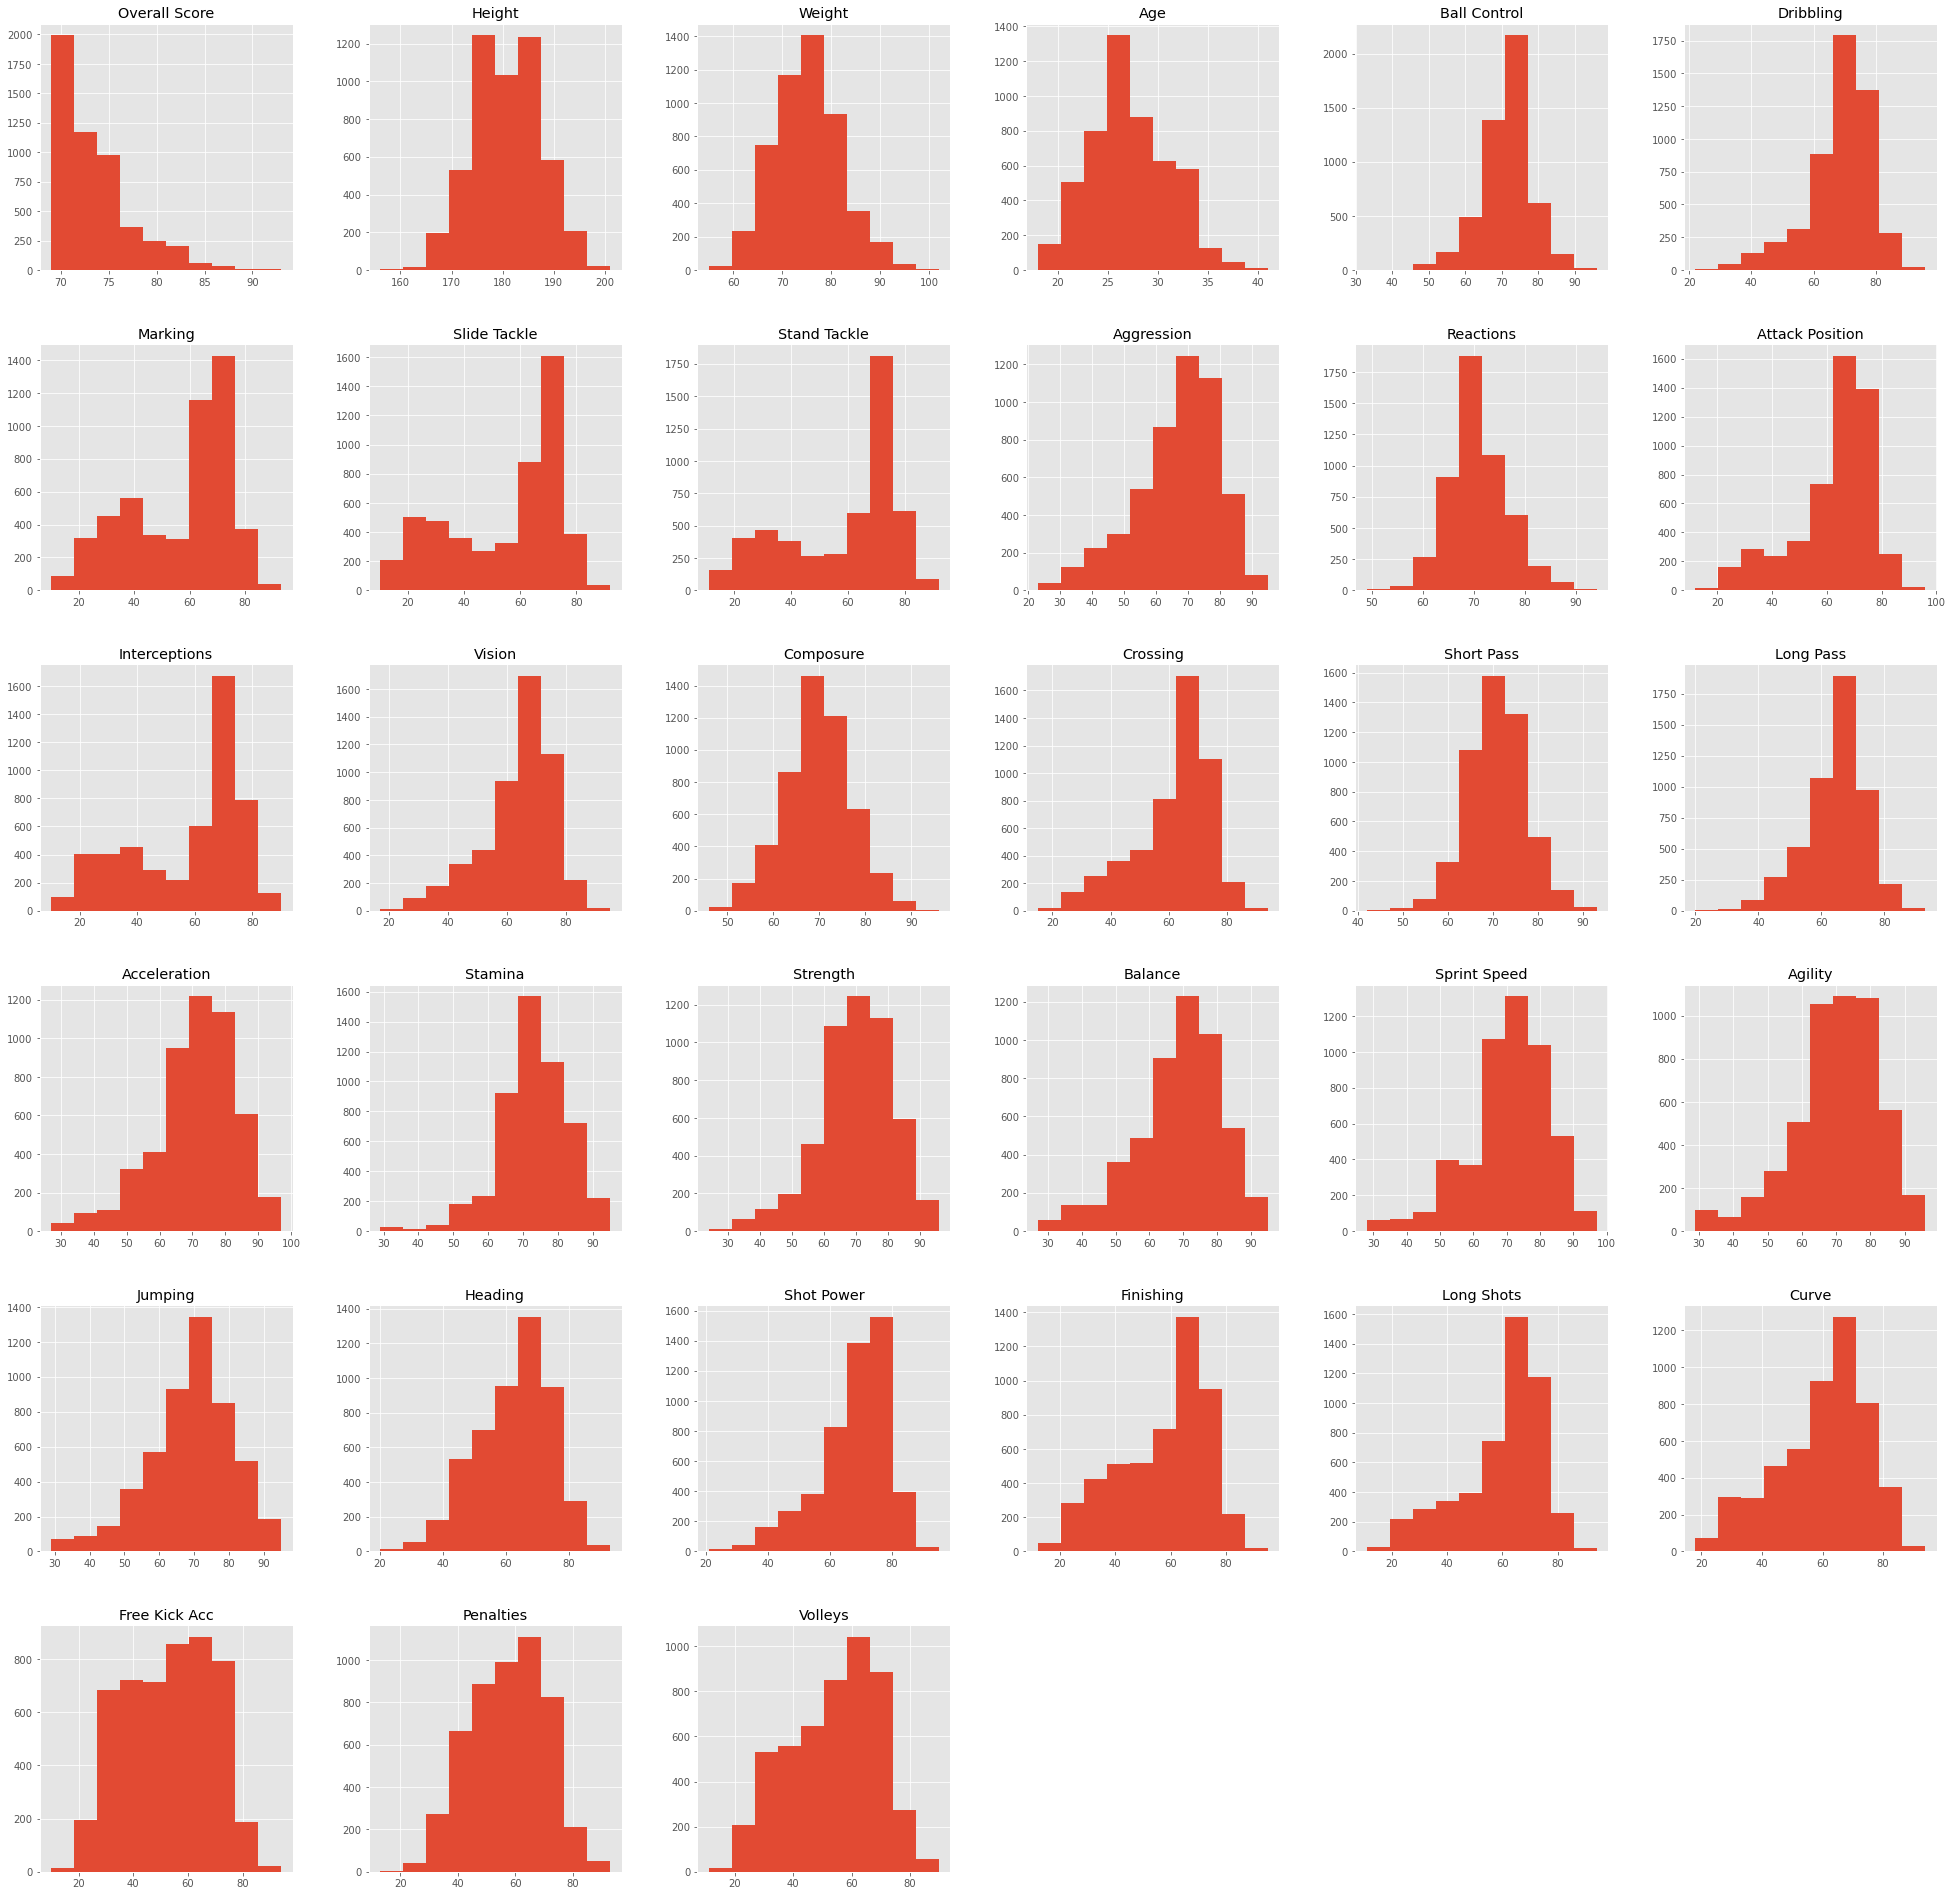

In [3]:
df2 = df.drop({"Player","Preferred Foot","Preferred Positions"}, axis=1)
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(df2)
df2.hist(figsize = (34,34))

Text(0, 0.5, 'Number of players')

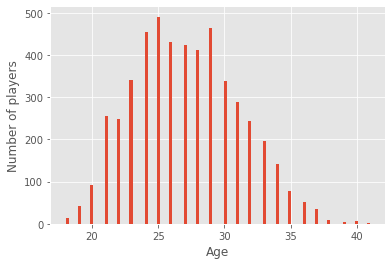

In [4]:
plt.hist(df.Age, bins=100)
plt.xlabel("Age")
plt.ylabel("Number of players")

0      Right Preferred Foot
1       Left Preferred Foot


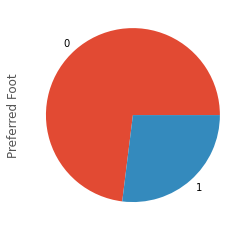

In [5]:
df['Preferred Foot'].value_counts().plot(kind='pie')
print("0      Right Preferred Foot")
print("1       Left Preferred Foot")

1      Defensive players
2      Middle players
3      Attacking players


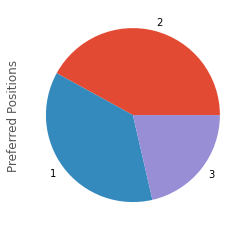

In [6]:
df['Preferred Positions'].value_counts().plot(kind='pie')
print("1      Defensive players")
print("2      Middle players")
print("3      Attacking players")

<AxesSubplot:xlabel='Weight'>

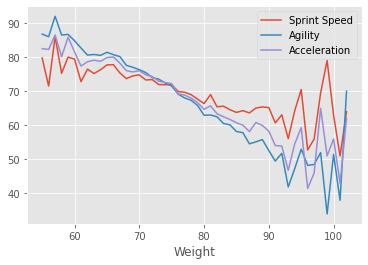

In [7]:
data=df.groupby(['Weight']).mean()[['Sprint Speed','Agility',"Acceleration"]]
data.plot()

<AxesSubplot:xlabel='Age'>

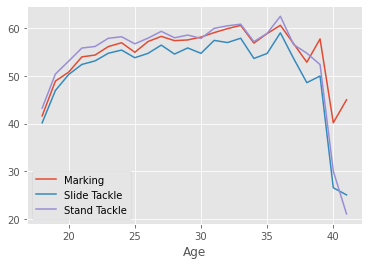

In [8]:
data=df.groupby(['Age']).mean()[['Marking','Slide Tackle',"Stand Tackle"]]
data.plot()

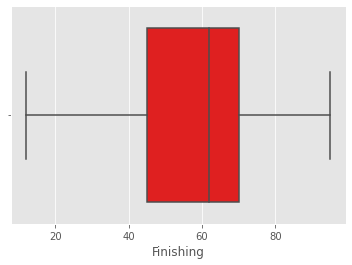

In [9]:
sns.boxplot(df["Finishing"],color ='r')
pd.options.mode.chained_assignment = None

In [10]:
ctf1 = pd.crosstab(df['Overall Score'],df['Preferred Foot'],normalize='index')
ctf1

Preferred Foot,0,1
Overall Score,,
69,0.756897,0.243103
70,0.717060,0.282940
71,0.729769,0.270231
72,0.759513,0.240487
73,0.684720,0.315280
74,0.700508,0.299492
75,0.752660,0.247340
76,0.714286,0.285714
77,0.727273,0.272727


Text(0, 0.5, 'Preferred Foot')

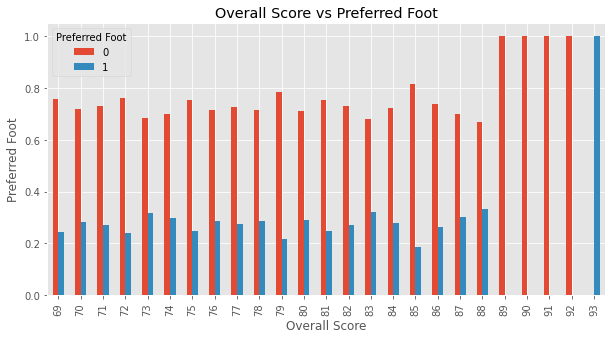

In [11]:
ctf1.plot(kind='bar', figsize=(10,5))
plt.title('Overall Score vs Preferred Foot')
plt.xlabel('Overall Score')
plt.ylabel('Preferred Foot')

<AxesSubplot:xlabel='Age', ylabel='Weight'>

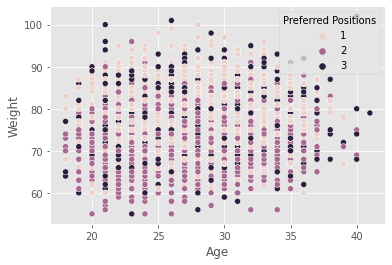

In [12]:
sns.scatterplot(x=df['Age'],y=df['Weight'],hue=df['Preferred Positions'])

<AxesSubplot:xlabel='Slide Tackle', ylabel='Stand Tackle'>

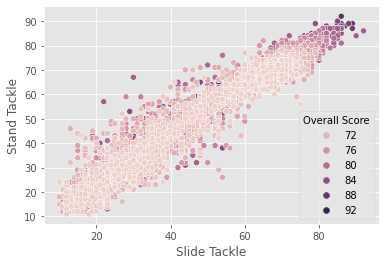

In [13]:
sns.scatterplot(data = df['Preferred Positions']==1, x =df['Slide Tackle'],y =df['Stand Tackle'],hue =df['Overall Score'])

<AxesSubplot:xlabel='Preferred Positions', ylabel='Dribbling'>

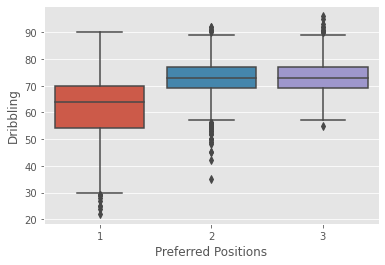

In [14]:
sns.boxplot(df['Preferred Positions'],df['Dribbling'])

<AxesSubplot:xlabel='Finishing', ylabel='Free Kick Acc'>

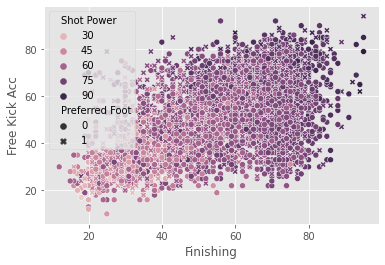

In [15]:
sns.scatterplot(data = df['Preferred Positions']==3,x = df['Finishing'],y = df['Free Kick Acc'],hue= df['Shot Power'],style = df['Preferred Foot'])

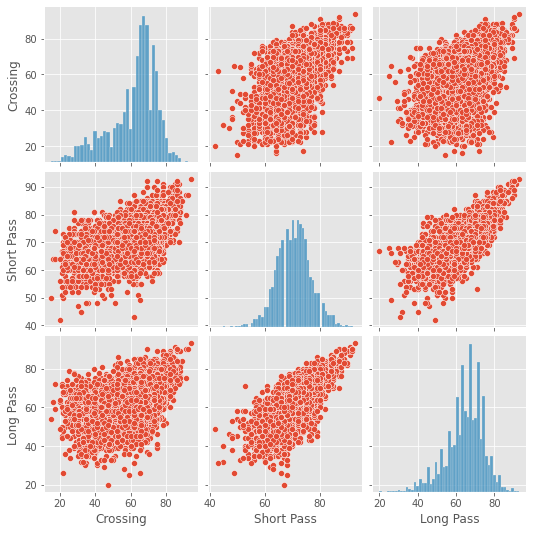

In [16]:
middle_player = df['Preferred Positions'] == 2
sns.pairplot(df[['Crossing','Short Pass','Long Pass']])

<AxesSubplot:>

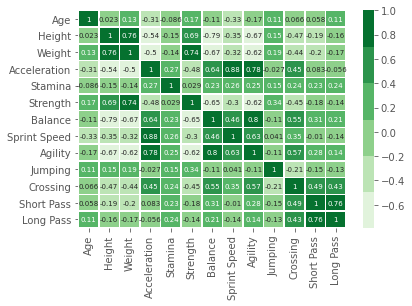

In [17]:
colormap = sns.color_palette("Greens") 
data = pd.DataFrame(df, columns = ['Age', 'Height', 'Weight','Acceleration','Stamina','Strength','Balance','Sprint Speed','Agility','Jumping','Crossing','Short Pass','Long Pass'])
sns.heatmap(data.corr(), annot=True,linewidths=.5, cmap=colormap,annot_kws={'size': 7})

<AxesSubplot:>

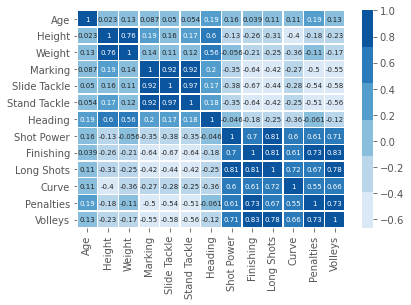

In [18]:
colormap = sns.color_palette("Blues") 
data1 = pd.DataFrame(df, columns = ['Age', 'Height', 'Weight','Marking','Slide Tackle','Stand Tackle','Heading','Shot Power','Finishing','Long Shots','Curve','Penalties','Volleys'])
sns.heatmap(data1.corr(), annot=True,linewidths=.5, cmap=colormap,annot_kws={'size': 7})

<AxesSubplot:>

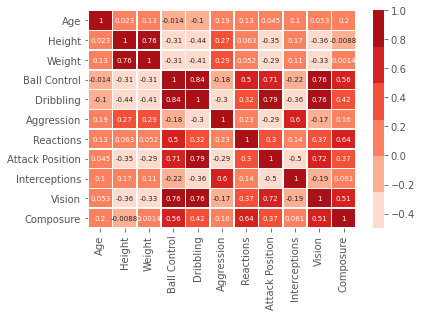

In [19]:
colormap = sns.color_palette("Reds") 
data2 = pd.DataFrame(df, columns = ['Age', 'Height', 'Weight','Ball Control','Dribbling','Aggression','Reactions','Attack Position','Interceptions','Vision','Composure'])
sns.heatmap(data2.corr(), annot=True,linewidths=.5, cmap=colormap,annot_kws={'size': 7})

<AxesSubplot:>

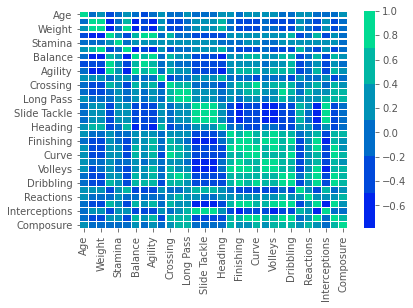

In [20]:
colormap = sns.color_palette("winter") 
data3 = pd.DataFrame(df, columns = ['Age', 'Height', 'Weight','Acceleration','Stamina','Strength','Balance','Sprint Speed','Agility','Jumping','Crossing','Short Pass','Long Pass','Marking','Slide Tackle','Stand Tackle','Heading','Shot Power','Finishing','Long Shots','Curve','Penalties','Volleys','Ball Control','Dribbling','Aggression','Reactions','Attack Position','Interceptions','Vision','Composure'])
sns.heatmap(data3.corr(), linewidths=.2, cmap=colormap)